# Exp2
Implement programs for visualizing time series data

In [ ]:
 pip install yfinance statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import zscore

In [ ]:
# Download Google stock data
data = yf.download("GOOGL", start="2010-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.609804  15.678545  15.547291  15.614785   78169752
2010-01-05  15.541063  15.636952  15.480044  15.620514  120067812
2010-01-06  15.149293  15.587637  15.101972  15.587637  158988852
2010-01-07  14.796625  15.192631  14.760512  15.177686  256315428
2010-01-08  14.993881  15.024515  14.672344  14.744323  188783028


#  Handle Missing Values

In [ ]:
data_f = data.fillna(method='ffill')

<ipython-input-66-559f19cda078>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_f = data.fillna(method='ffill')


# Remove Duplicates

In [ ]:
data_f = data_f.drop_duplicates()

# Detect and Handle Outliers

In [ ]:
z_scores_close = zscore(data_f['Close'])
z_scores_high = zscore(data_f['High'])
z_scores_low = zscore(data_f['Low'])

In [ ]:
# Identify outliers (Z-score > 3 or < -3)
outliers_close = np.abs(z_scores_close) > 3
outliers_high = np.abs(z_scores_high) > 3
outliers_low = np.abs(z_scores_low) > 3

In [ ]:
# Convert outlier DataFrames to boolean Series
outliers_close = outliers_close.iloc[:, 0]  # Get the first (and only) column as a Series
outliers_high = outliers_high.iloc[:, 0]
outliers_low = outliers_low.iloc[:, 0]

In [ ]:
# Replace outliers with the median value of each column
data_f.loc[data_f.index[outliers_close], 'Close'] = data_f['Close'].median()
data_f.loc[data_f.index[outliers_high], 'High'] = data_f['High'].median()
data_f.loc[data_f.index[outliers_low], 'Low'] = data_f['Low'].median()

In [ ]:
# Normalize the Data using Min-Max Scaling
data_f['Normalized Close'] = (data_f['Close'] - data_f['Close'].min()) / (data_f['Close'].max() - data_f['Close'].min())
data_f['Normalized High'] = (data_f['High'] - data_f['High'].min()) / (data_f['High'].max() - data_f['High'].min())
data_f['Normalized Low'] = (data_f['Low'] - data_f['Low'].min()) / (data_f['Low'].max() - data_f['Low'].min())


In [ ]:
# Reset index and store date separately
data_f = data_f.reset_index()

In [ ]:
# Preview the cleaned dataset
print(data_f.head())

Price        Date      Close       High        Low       Open     Volume  \
Ticker                 GOOGL      GOOGL      GOOGL      GOOGL      GOOGL   
0      2010-01-04  15.609804  15.678545  15.547291  15.614785   78169752   
1      2010-01-05  15.541063  15.636952  15.480044  15.620514  120067812   
2      2010-01-06  15.149293  15.587637  15.101972  15.587637  158988852   
3      2010-01-07  14.796625  15.192631  14.760512  15.177686  256315428   
4      2010-01-08  14.993881  15.024515  14.672344  14.744323  188783028   

Price  Normalized Close Normalized High Normalized Low  
Ticker                                                  
0              0.025591        0.024521       0.025807  
1              0.025221        0.024302       0.025441  
2              0.023110        0.024043       0.023386  
3              0.021209        0.021965       0.021530  
4              0.022272        0.021081       0.021051  


# Exp2b
Load and Analyze Time Series Data


# Line Plot

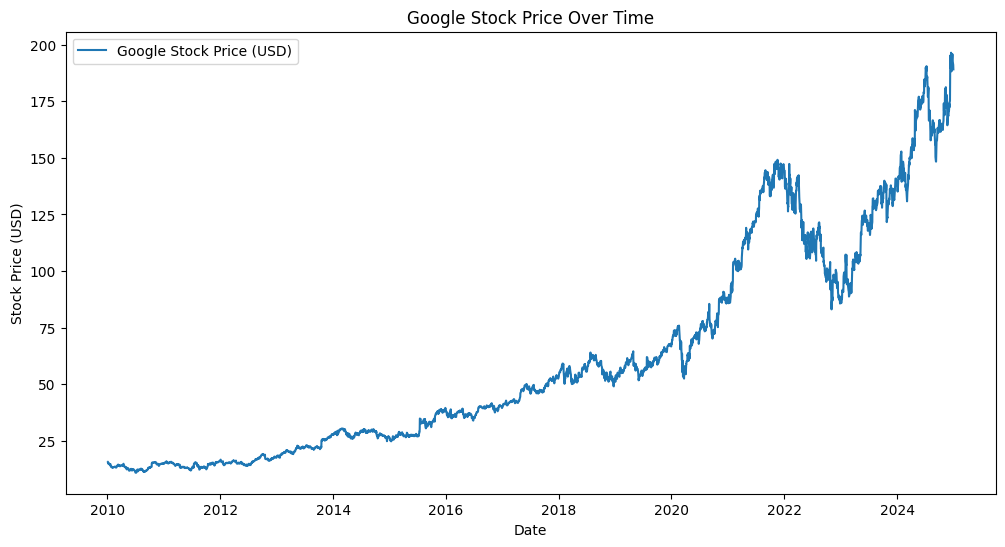

In [ ]:
# Line Plot for Google Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(data_f['Date'], data_f['Close'], label='Google Stock Price (USD)')
plt.title('Google Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Resample data to get monthly averages
data_f.set_index("Date", inplace=True)
monthly_data = data_f['Close'].resample('M').mean()

<ipython-input-82-84f83dc44105>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_f['Close'].resample('M').mean()


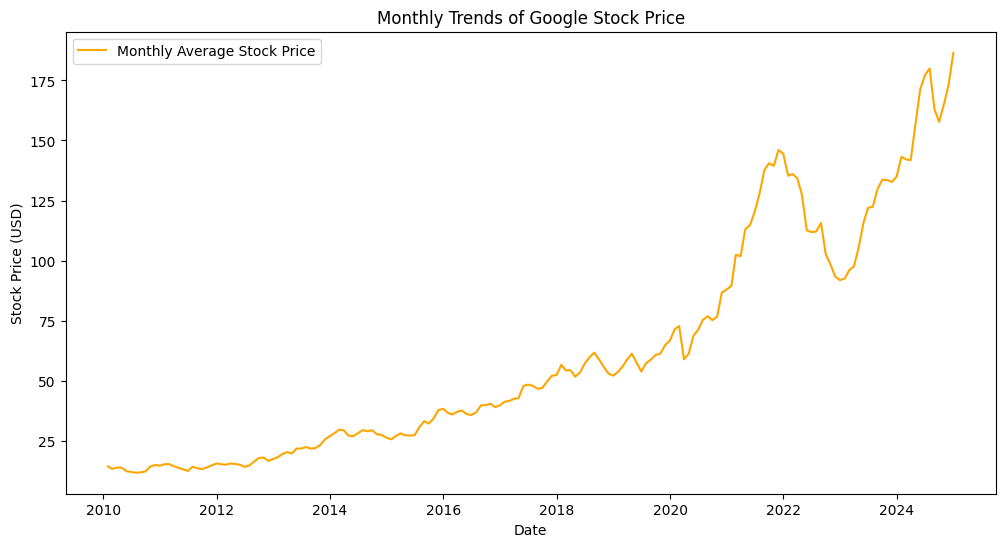

In [ ]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Stock Price', color='orange')
plt.title('Monthly Trends of Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Histogram

<Figure size 1000x500 with 0 Axes>

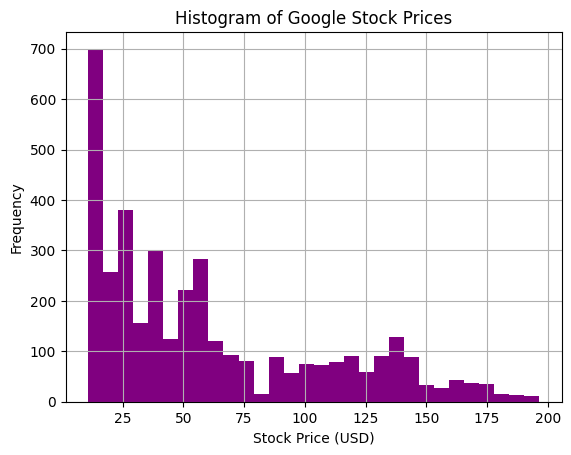

In [ ]:
# Histogram of Closing Prices
plt.figure(figsize=(10, 5))
data_f['Close'].hist(bins=30, color='purple')
plt.title('Histogram of Google Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Box Plot

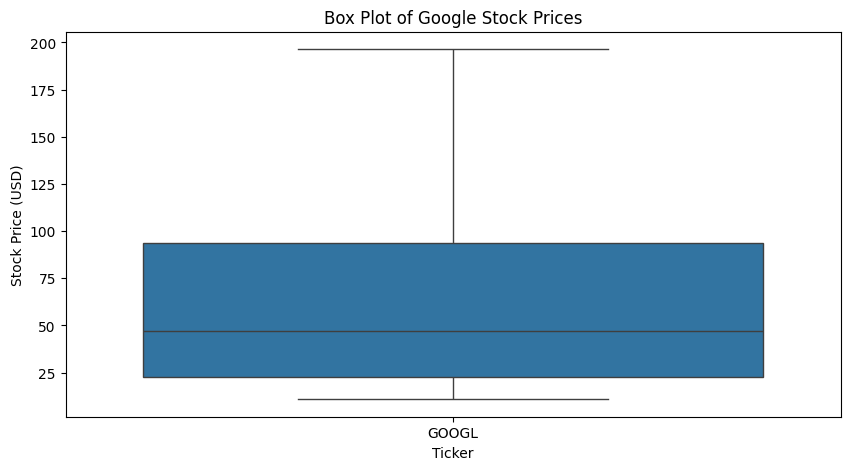

In [ ]:
# Box Plot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_f['Close'])
plt.title('Box Plot of Google Stock Prices')
plt.ylabel('Stock Price (USD)')
plt.show()